## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. 

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

https://github.com/udacity/data-analyst/blob/master/projects_zh/P7%20ab_test/Final%20Project%20Template.pdf

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
total_users = float(df.shape[0])
total_users 

294478.0

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [30]:
users_converted=float(df.query('converted == 1')['user_id'].nunique())
p1 = (users_converted/total_users)
print("The proportion of users converted is {0:.2%}".format(p1))

The proportion of users converted is 11.94%


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().values.any()
#The result shows there is no missing values

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [24]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or \
              (group == "control" and landing_page == "old_page")')

In [25]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [26]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [27]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']
#User_id 773192 is repeated

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [28]:
df2[df2['user_id'] == 773192]
#Two rows has dfferent timestamp and other columns are the same 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [29]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [31]:
converted_users2 = float(df2.query('converted == 1')['user_id'].nunique())
p2 = converted_users2/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(p2))

The probability of an individual converting regardless of the page they receive is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [32]:
converted_controlusers2 = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_users2 =float(df2.query('group == "control"')['user_id'].nunique())
cp2 = converted_controlusers2 /control_users2
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(cp2))

 Given that an individual was in the control group, the probability they converted is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [33]:
converted_controlusers2 = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treat_users2 =float(df2.query('group == "treatment"')['user_id'].nunique())
tp2 = converted_controlusers2 /treat_users2
print(" Given that an individual was in the treatment group, the probability they converted is {0:.2%}".format(tp2))

 Given that an individual was in the treatment group, the probability they converted is 11.88%


d. What is the probability that an individual received the new page?

In [34]:
new_page_users2 = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
Newpage_p2 = new_page_users2/float(df2.shape[0])
print("The probability that an individual received the new page is {0:.2%}".format(Newpage_p2))


The probability that an individual received the new page is 50.01%


In [35]:
new_c2 = float(df2.query('converted == 1 and  landing_page == "new_page"')['user_id'].nunique())
new_users2 =float(df2.query('landing_page == "new_page"')['user_id'].nunique())

print(" Given that an individual was in new landing page, the probability they converted is {0:.2%}".format(new_c2 /new_users2))

 Given that an individual was in new landing page, the probability they converted is 11.88%


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The probability of an individual converting regardless of the page they receive is 11.96%,
Given that an individual was in the control group, the probability they converted is 12.04%
Given that an individual was in the treatment group, the probability they converted is 11.88%.
The probablity users converted in both control and treatment group are pretty similar to each other and  probability of an individual converting regardless of the page they receive. therefore, there is no evidence that ne page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, I could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do i stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do I run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothese is H0: p_new - p_old <= 0  
Alternative hypothese is H1: p_new - p_old > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - I am going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure I am on the right track.<br><br>

Here we are looking at a null where there is no difference in conversion based on the page, which means the conversions for each page are the same.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [37]:
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()
p_new

0.11880806551510564

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [105]:
p_old = p_new # df2[df2['landing_page']=='old_page']['converted'].mean()
p_old

0.11880806551510564

c. What is $n_{new}$?

In [106]:
n_new = df2[df2['landing_page']=='new_page']['user_id'].nunique()
n_new 

145310

d. What is $n_{old}$?

In [107]:
n_old = df2[df2['landing_page']=='old_page']['user_id'].nunique() 
n_old 

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [108]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.binomial(1, p_new, n_new)

#Display new_page_converted
print('binomial', new_page_converted.mean())

#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([1, 0], n_new, p=(p_new,1-p_new))

#Display new_page_converted
print('random choice', new_page_converted.mean())

binomial 0.11991604156630652
random choice 0.11829880944188287


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [109]:
#Simulate  n_old  transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.binomial(1, p_old, n_old)

#Display old_page_converted
print('binomial', old_page_converted.mean())

#Simulate  n_old  transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.choice([1, 0], n_old, p=(p_old,1-p_old))

#Display old_page_converted
print('random choice', old_page_converted.mean())

binomial 0.11879620579043738
random choice 0.11949144375456035


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [110]:
#Find  pnewpnew  -  poldpold  for your simulated values from part (e) and (f).
new_page_converted.mean() - old_page_converted.mean()

-0.001192634312677479

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [111]:
p_diffs = []

# Perform the sampling distribution for the difference in conversion rate
# between the two pages over 10,000 trails.
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation


# # Re-run simulation 10,000 times
# # trange creates an estimate for how long this program will take to run
# for i in range(10000):
#     new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)])
#     old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)])
#     p_diff = new_page_converted.mean()-old_page_converted.mean()
#     p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [114]:
obs_diff = df2.query('group=="treatment"').converted.mean() - df2.query('group=="control"').converted.mean()
sim_diff = np.array(p_diffs).mean()
obs_diff, sim_diff

(-0.0015782389853555567, 8.251516324085703e-07)

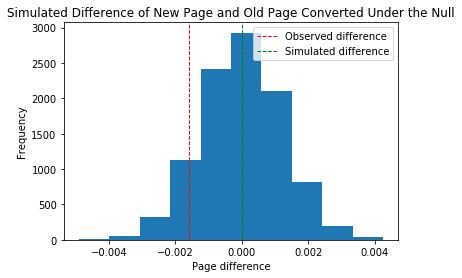

In [115]:
plt.hist(p_diffs)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(obs_diff), color='r', linestyle='dashed', linewidth=1, label="Observed difference")
plt.axvline(x=(sim_diff), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [175]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
(null_vals > obs_diff).mean()

0.9018

In [173]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > obs_diff).mean()

0.9016

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value computed in part j is called "p-value" in scientific studies. The p-value is the probability of getting our statistic (or a more extreme value) if the null is true. When the p-value is large, which in this case, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.
Also the p-value is greater than Type I Error (p-value 0.9062 > alpha 0.05), thus we fail to reject the null.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [138]:
# Import stasmodels api
import statsmodels.api as sm

# Number of sucesses in trials for old and new pages
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]

# Number of trials for old and new pages
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

In [139]:
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

alternative (string in ['two-sided', 'smaller', 'larger']) – The alternative hypothesis can be either two-sided or one of the one- sided tests, smaller means that the alternative hypothesis is prop < value and larger means prop > value. In the two sample test, smaller means that the alternative hypothesis is p1 < p2 and larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one.

In [186]:

from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

z_score, norm.ppf(1-(0.05/2)), p_value

(-1.3109241984234394, 1.959963984540054, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Simply put, a z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is

The p-value is the probability of getting our statistic (or a more extreme value) if the null is true. When the p-value is large, which in this case, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression, due to the fact that response variable is categorical variable. 
logistic regression is multiple regression but with an outcome variable that is a categorical variable and predictor variables that are continuous 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [187]:
#create a colun for the intercept
df2['intercept'] = 1

In [188]:
#create a dummy variable column for which page each user received
df2= df2.join(pd.get_dummies(df2['landing_page']))

In [189]:
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [190]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [191]:
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [194]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        17:04:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The alternative hypothesis for Logistic Regression is two-sided test where as it was one-sided test for Part II. 

The p-value associated with ab_page is 0.190. This p-value is still much too high to reject the null hypothesis.

According to the resource I found (below), "Depending on the direction of the one-tailed hypothesis, its p-value is either 0.5*(two-tailed p-value) or 1-0.5*(two-tailed p-value) if the test statistic symmetrically distributed about zero."

I can calculate one-tailed p-value from two-tailed p-value by

0.5*0.190 = 0.095 or 1-(0.5*0.190) = 0.905 ---> Matches with proportions_ztest p-value.

Or I can calculate two-tailed p-value from one-tailed p-value by

0.095/0.5 = 0.19 or (1-0.905)/0.5 = 0.19 ---> Matches with Logistic Regression p-value.



f. Now, I am considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into   regression model.  Are there any disadvantages to adding additional terms into   regression model?

Other factor can be the time(timestamp	variable). We can check if the converted rate depends on certain time of the day or certain day when user browerse the website.
For timestamp	variable, we can further convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".
Disadavantage for adding additional terms into regression model is that it will make interpretate the model more complex and also, if new terms are dependable variable with the exisiting explanatory term, we need to add higher order term to help predict the result better.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [196]:
c = pd.read_csv('data/countries.csv')
c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [197]:
#Join ab dataset with country dataset
df3 = df2.merge(c, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [198]:
c['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [199]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])

In [200]:
#Create intercept variable
df3['intercept'] = 1

#Create Logit regression model for conveted and country, and us CA and old page as baseline
logit3 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])
result = logit3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Jul 2018   Pseudo R-squ.:               2.325e-05
Time:                        17:09:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1757
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.248      0.000      -2.082      -1.978
new_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.075      -0.005       0.106
US             0.0408      0.027      1.516      0.129      -0.012       0.093
==============================================================================
"""

In [204]:
# Exponentiate coefficient of each explanatory variables to interpret the result
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.015113064615719, 1.0519020483004984, 1.0416437559600236)

Interpreting Result:

For every unit for new_page decrease, convert will be 1.5% more likely to happen, holding all other varible constant.

For every unit for UK increases, convert is 5.2% more to happen, holding all other varible constant.

For every unit for US increases, convert is 4.2% more to happen, holding all other varible constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.
What the p-value for each country? what is the p-critical, does the coefficient calculated for each country is significant?

In [98]:
#Create a new intereacton variable between new page and country US and UK
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']

In [99]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
logit4 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:               3.484e-05
Time:                        19:45:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1917
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.871      0.384      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0176      0.038      0.466      0.641      -0.056       0.091
===============================================================================
"""

In [300]:
#exponentiated the CV to inteprete the result
np.exp(result4.params)

intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.047978
UK             1.011854
US             1.017705
dtype: float64

Interpreting Result:

From the above Logit Regression Results, we can see the coefficient of intereaction variable "UK_new_page" and "US_new_page" are different from the coefficient of new_page itself. 

Also,only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other varable in the summary are not statistically significant. 
Additionally, Z-score for all X variables are not large enough to be significant for predicting converted rate. 

Therefore, the country a user lives is not significant on the converted rate considering the page the user land in. 

For every unit for new_page decreases, convert will be 7.0% more likely to happen, holding all other varible constant.

Convert is 1.08 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.

Convert is 1.04 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

Convert is 1.18 % more likely to happen for the users in UK than CA, holding all other varible constant.

Convert is 1.76 % more likely to happen for the users in US than CA, holding all other varible constant.


In [324]:
#Import sklearn model to split, test and score data,and fit data model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [346]:
#Define X and Y variable 
x = df3[['new_page','UK_new_page','US_new_page','UK','US']]
y = df3['converted']
        
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [347]:
lm = LinearRegression()

In [348]:
lm.fit(X_train,y_train) # fit the train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [351]:
print(lm.score(X_test,y_test))

-8.6031383939e-06


The score reuslt is very low, which mean the page and country dataset are not a good fit to predit converted rate .